In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.utils import compute_sample_weight
from sklearn.metrics import balanced_accuracy_score
from plot_learning_curve import plot_learning_curve, plot_validation_curve
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import preprocessing

None


### Loading and Preprocessing Data

In [2]:
adult_train = pd.read_csv("adult-t.tsv", sep = "\t")
adult_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,42.0,4,308770.0,15,10.0,2,1,0,2,1,0.0,0.0,40.0,39,0
1,23.0,4,520231.0,15,10.0,4,10,1,4,0,0.0,0.0,45.0,39,1
2,27.0,4,164924.0,11,9.0,4,3,1,4,1,0.0,0.0,40.0,39,1
3,29.0,6,198286.0,9,13.0,4,10,1,4,0,0.0,0.0,40.0,39,1
4,32.0,4,197505.0,11,9.0,4,1,3,4,0,0.0,0.0,40.0,39,1


In [3]:
adult_train = pd.get_dummies(adult_train, columns=['workclass', 'education', 'sex', 'occupation', 'relationship', 'race', 'native-country', 'marital-status'])
adult_train.shape

(10000, 108)

In [4]:
adult_train['target'].value_counts()/adult_train.shape[0]

1    0.7641
0    0.2359
Name: target, dtype: float64

In [5]:
normalize_columns = ['age', 'fnlwgt', 'capital-gain','capital-loss','hours-per-week']
def normalize(columns):
  scaler = preprocessing.StandardScaler()
  adult_train[columns] = scaler.fit_transform(adult_train[columns])
normalize(normalize_columns)

In [6]:
X = adult_train[[c for c in adult_train.columns if c != 'target']]
y = adult_train['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

### Trying DT Classifier without HyperParameter tunings

In [7]:
base_clf = DecisionTreeClassifier()

In [8]:
base_clf.fit(X_train, y_train)
y_train_pred = base_clf.predict(X_train)
y_test_pred = base_clf.predict(X_test)
print("Train Accuracy: ", balanced_accuracy_score(y_train, y_train_pred))
print("Test Accuracy: ", balanced_accuracy_score(y_test, y_test_pred))

Train Accuracy:  1.0
Test Accuracy:  0.7449270861064277


In [9]:
base_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

### Generate Learning Curve & Validation Curve with default classifier

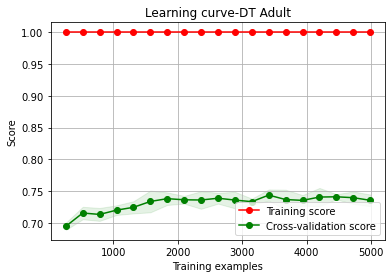

In [10]:
plot_learning_curve(base_clf, "Learning curve-DT Adult", X_train, y_train, ylim=None, cv=4, n_jobs=-1)

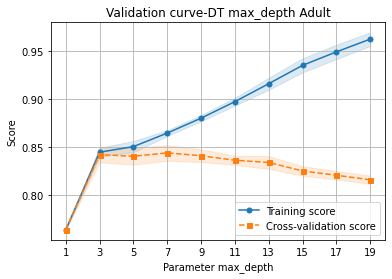

In [11]:
plot_validation_curve(base_clf, X_train, y_train, 'max_depth', np.arange(1, 20, 2), cv=4, n_jobs=-1,scoring=make_scorer(balanced_accuracy_score), title="Validation curve-DT max_depth Adult")

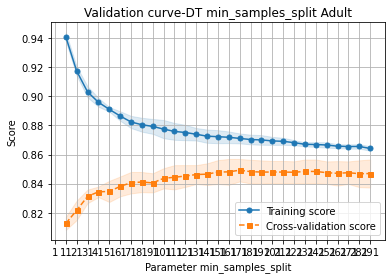

In [12]:
plot_validation_curve(base_clf, X_train, y_train, 'min_samples_split', np.arange(1, 300, 10), cv=4, n_jobs=-1,scoring=make_scorer(balanced_accuracy_score), title="Validation curve-DT min_samples_split Adult")

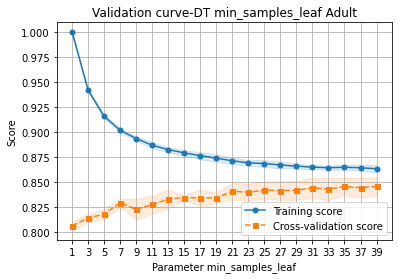

In [13]:
plot_validation_curve(base_clf, X_train, y_train, 'min_samples_leaf', np.arange(1, 40, 2), cv=4, n_jobs=-1, scoring=make_scorer(balanced_accuracy_score), title="Validation curve-DT min_samples_leaf Adult")

### Conducting GridSearch to obtain best HyperParameters

In [14]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1,15),
    'min_samples_split': np.arange(1, 300, 10),
    'min_samples_leaf': np.arange(1, 40, 5)
}

In [15]:
grid_search = GridSearchCV(base_clf, param_grid= param_grid, cv=4, scoring=make_scorer(balanced_accuracy_score), verbose=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 6720 candidates, totalling 26880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 8893 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 9026 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 9161 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 9296 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 9433 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 9570 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 9709 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 9848 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 9989 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 10130 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 10273 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done 10416 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 10561 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 10706 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 10853 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done 11000 tasks      | el

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 15),
                         'min_samples_leaf': array([ 1,  6, 11, 16, 21, 26, 31, 36]),
                         'min_samples_split': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251,
       261, 271, 281, 291])},
             scoring=make_scorer(balanced_accuracy_score), verbose=10)

In [16]:
df = pd.DataFrame(grid_search.cv_results_)
df.sort_values(by='rank_test_score').head(2)
#df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
2928,0.211684,0.006775,0.013217,0.000822,gini,13,6,181,"{'criterion': 'gini', 'max_depth': 13, 'min_sa...",0.77257,0.77002,0.752272,0.767472,0.765584,0.007894,1
2688,0.204457,0.024712,0.013959,0.000703,gini,12,6,181,"{'criterion': 'gini', 'max_depth': 12, 'min_sa...",0.77257,0.77002,0.751987,0.767472,0.765512,0.008014,2


In [17]:
df_n = df.set_index(['param_criterion', 'param_max_depth'])

In [18]:
df_n.sort_values(by='rank_test_score').head()

mean_fit_time  std_fit_time  mean_score_time  \
param_criterion param_max_depth                                                 
gini            13                    0.211684      0.006775         0.013217   
                12                    0.204457      0.024712         0.013959   
                13                    0.200107      0.005319         0.015839   
                12                    0.180015      0.016967         0.016951   
                14                    0.190411      0.010254         0.012137   

                                 std_score_time param_min_samples_leaf  \
param_criterion param_max_depth                                          
gini            13                     0.000822                      6   
                12                     0.000703                      6   
                13                     0.003033                      6   
                12                     0.006947                      6   
                14                     0.007024                      6   

                                param_min_samples_split  \
param_criterion param_max_depth                           
gini            13                                  181   
                12                                  181   
                13                                  191   
                12                                  191   
                14                                  181   

                                                                            params  \
param_criterion param_max_depth                                                      
gini            13               {'criterion': 'gini', 'max_depth': 13, 'min_sa...   
                12               {'criterion': 'gini', 'max_depth': 12, 'min_sa...   
                13               {'criterion': 'gini', 'max_depth': 13, 'min_sa...   
                12               {'criterion': 'gini', 'max_depth': 12, 'min_sa...   
                14               {'criterion': 'gini', 'max_depth': 14, 'min_sa...   

                                 split0_test_score  split1_test_score  \
param_criterion param_max_depth                                         
gini            13                        0.772570            0.77002   
                12                        0.772570            0.77002   
                13                        0.772570            0.77002   
                12                        0.772570            0.77002   
                14                        0.774997            0.77002   

                                 split2_test_score  split3_test_score  \
param_criterion param_max_depth                                         
gini            13                        0.752272           0.767472   
                12                        0.751987           0.767472   
                13                        0.750776           0.767472   
                12                        0.750491           0.767472   
                14                        0.747430           0.767935   

                                 mean_test_score  std_test_score  \
param_criterion param_max_depth                                    
gini            13                      0.765584        0.007894   
                12                      0.765512        0.008014   
                13                      0.765210        0.008526   
                12                      0.765138        0.008647   
                14                      0.765096        0.010517   

                                 rank_test_score  
param_criterion param_max_depth                   
gini            13                             1  
                12                             2  
                13                             3  
                12                             4  
                14                             5

In [19]:
gini = df_n.xs('gini', level='param_criterion')
entropy = df_n.xs('entropy', level='param_criterion')

In [20]:
gini.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
param_max_depth,,,,,,,,,,,,,,
1,0.030165,0.003892,0.000000,0.000000,1,1,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",NaN,NaN,NaN,NaN,NaN,NaN,6720
1,0.068566,0.007206,0.014707,0.001475,1,11,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.5,0.5,0.5,0.5,0.5,0.0,6033
1,0.051112,0.008326,0.027926,0.014033,1,21,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.5,0.5,0.5,0.5,0.5,0.0,6033
1,0.049868,0.007562,0.019949,0.006727,1,31,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.5,0.5,0.5,0.5,0.5,0.0,6033
1,0.055605,0.014039,0.025929,0.014474,1,41,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.5,0.5,0.5,0.5,0.5,0.0,6033


In [21]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 13,
 'min_samples_leaf': 6,
 'min_samples_split': 181}

In [22]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=13, min_samples_leaf=6, min_samples_split=181)

In [23]:
grid_search.best_score_

0.7655837159849705

### Generating Learning Curve with tuned Hyperparameters 

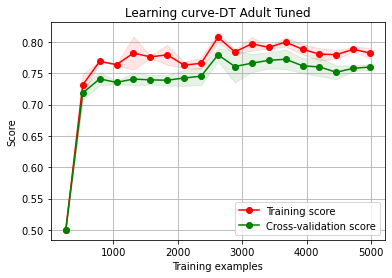

In [24]:
plot_learning_curve(grid_search.best_estimator_, "Learning curve-DT Adult Tuned", X_train, y_train, ylim=None, cv=4, n_jobs=-1)

### Fitting classifier with best parameters and calculating test score

In [25]:
# best_params = grid_search.cv_results_['params'][np.argmax(grid_search.cv_results_['mean_test_score'])]
# best_clf = DecisionTreeClassifier(**best_params)
# best_clf.get_params()

best_clf =DecisionTreeClassifier(max_depth=13, min_samples_leaf=6, min_samples_split=181)

In [26]:
best_clf.fit(X_train, y_train)
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)
print("Train Accuracy: ", balanced_accuracy_score(y_train, y_train_pred))
print("Test Accuracy: ", balanced_accuracy_score(y_test, y_test_pred))

Train Accuracy:  0.7911689001685954
Test Accuracy:  0.7718113112668974


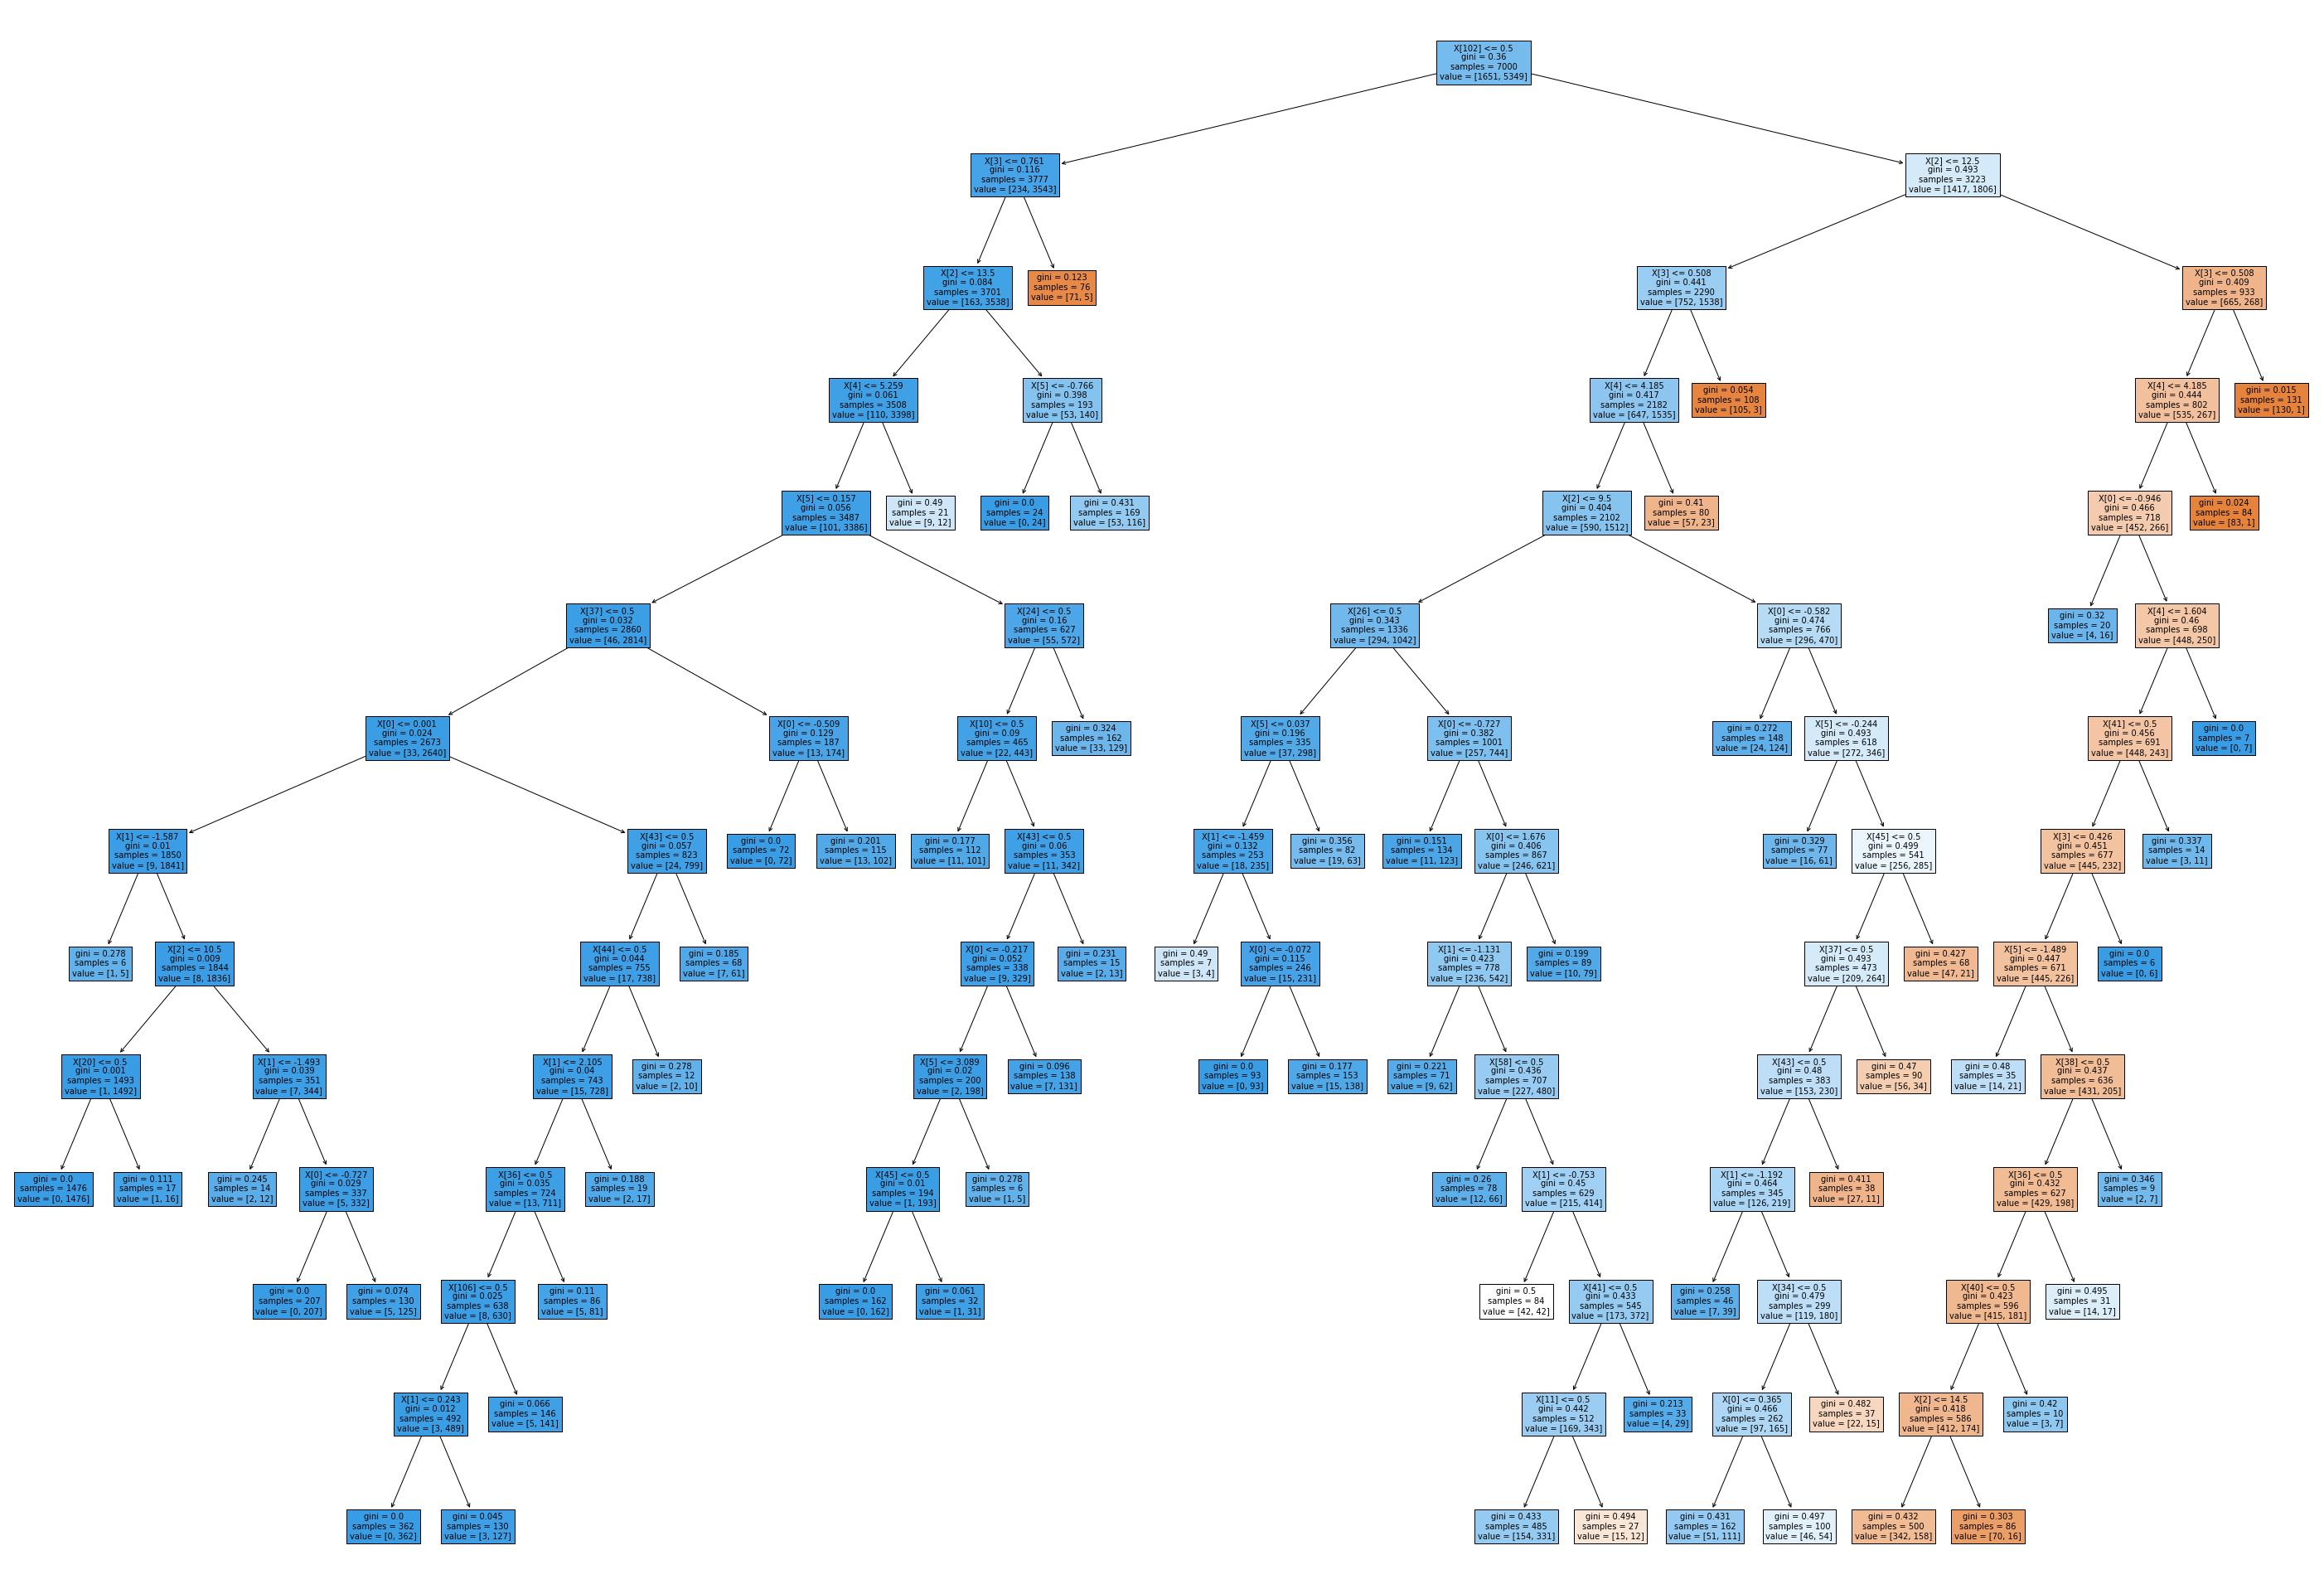

In [27]:
fig = plt.figure(figsize=(50,35))
_ = tree.plot_tree(best_clf,
                   filled=True)